In [2]:
# Import packages
import numpy as np 
from matplotlib import pyplot as plt
import time

# Function game

In [4]:
def game(n,m,N,T,R,P,S):
    prisonTime = 0
    trust = True
    for play in range(0,N):
        if trust == True:
            if play < n:
                player = 'angel'
            else:
                player = 'devil'
                trust = False
            if play < m:
                opponent = 'angel'
            else:
                opponent = 'devil'
                trust = False
        else:
            player = 'devil'
            opponent = 'devil'
        
        if player == 'angel':
            if opponent == 'angel':
                prisonTime += R
            else:
                prisonTime += S
        else:
            if opponent == 'angel':
                prisonTime += T
            else:
                prisonTime += P
    return(prisonTime)

# Exercise 13.1

Text(0.5, 1.0, 'Strategy against m = 6')

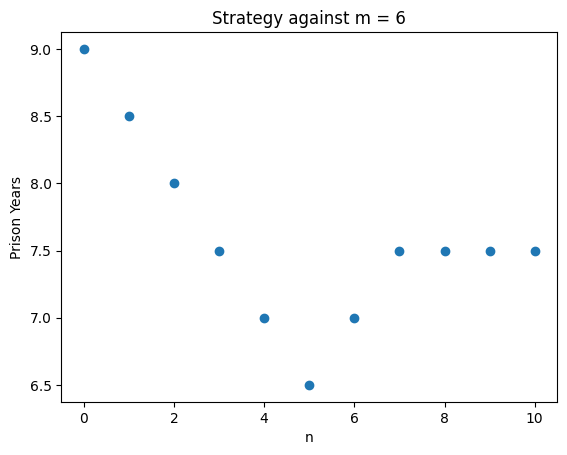

In [5]:
# (a) Prisoner's Dilemma with multiple rounds

# Parameters
N = 10
T = 0
R = 0.5
P = 1
S = 1.5

# Strategy oponent:
m = 6

# Strategy player:
nList = [0,1,2,3,4,5,6,7,8,9,10]

prisonTimeList = []
for n in nList:
    prisonTime = 0
    trust = True
    for play in range(0,N):
        if trust == True:
            if play < n:
                player = 'angel'
            else:
                player = 'devil'
                trust = False
            if play < m:
                opponent = 'angel'
            else:
                opponent = 'devil'
                trust = False
        else:
            player = 'devil'
            opponent = 'devil'
        
        if player == 'angel':
            if opponent == 'angel':
                prisonTime += R
            else:
                prisonTime += S
        else:
            if opponent == 'angel':
                prisonTime += T
            else:
                prisonTime += P
    prisonTimeList.append(prisonTime)

#Plot
plt.figure(1)
plt.scatter(nList,prisonTimeList)
plt.xlabel('n')
plt.ylabel('Prison Years')
plt.title('Strategy against m = %i'%(m))


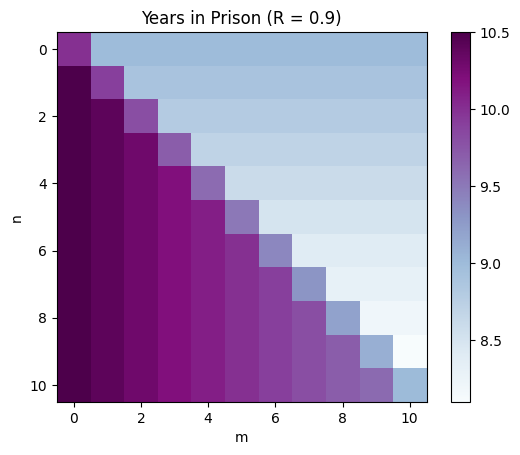

In [10]:
# (b)

# Parameters
N = 10
T = 0
R = 0.9
P = 1
S = 1.5

#Strategy oponent:
mList = [0,1,2,3,4,5,6,7,8,9,10]

#Strategy player:
nList = [0,1,2,3,4,5,6,7,8,9,10]


prisonTimeArray = np.zeros([11,11])
for m in mList:
    for n in nList:
        prisonTime = 0
        trust = True
        for play in range(0,N):
            if trust == True:
                if play < n:
                    player = 'angel'
                else:
                    player = 'devil'
                    trust = False
                if play < m:
                    opponent = 'angel'
                else:
                    opponent = 'devil'
                    trust = False
            else:
                player = 'devil'
                opponent = 'devil'
            
            if player == 'angel':
                if opponent == 'angel':
                    prisonTime += R
                else:
                    prisonTime += S
            else:
                if opponent == 'angel':
                    prisonTime += T
                else:
                    prisonTime += P
            prisonTimeArray[n,m] = prisonTime

# Plot heatmap
plt.figure(1)
plt.imshow(prisonTimeArray,'BuPu')
plt.xlabel('m')
plt.ylabel('n')
plt.title('Years in Prison (R = 0.9)')
plt.colorbar()


Text(0.5, 1.0, 'Strategy against m = 6')

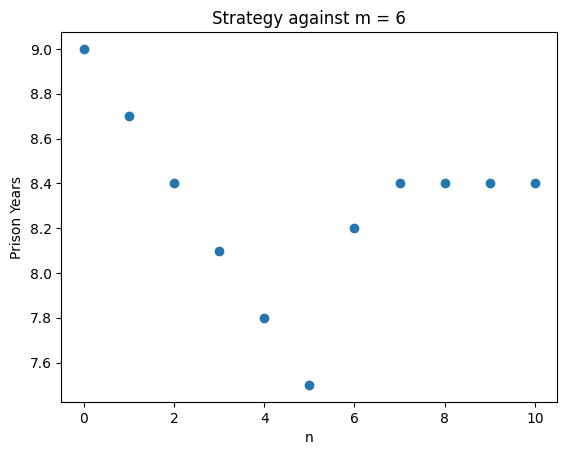

In [11]:
# (c)
# Parameters
N = 10
T = 0
R = 0.7
P = 1
S = 1.2


# Strategy oponent:
m = 6

# Strategy player:
nList = [0,1,2,3,4,5,6,7,8,9,10]

prisonTimeList = []
for n in nList:
    prisonTime = 0
    trust = True
    for play in range(0,N):
        if trust == True:
            if play < n:
                player = 'angel'
            else:
                player = 'devil'
                trust = False
            if play < m:
                opponent = 'angel'
            else:
                opponent = 'devil'
                trust = False
        else:
            player = 'devil'
            opponent = 'devil'
        
        if player == 'angel':
            if opponent == 'angel':
                prisonTime += R
            else:
                prisonTime += S
        else:
            if opponent == 'angel':
                prisonTime += T
            else:
                prisonTime += P
    prisonTimeList.append(prisonTime)

#Plot
plt.figure(1)
plt.scatter(nList,prisonTimeList)
plt.xlabel('n')
plt.ylabel('Prison Years')
plt.title('Strategy against m = %i'%(m))

# Exercise 13.2

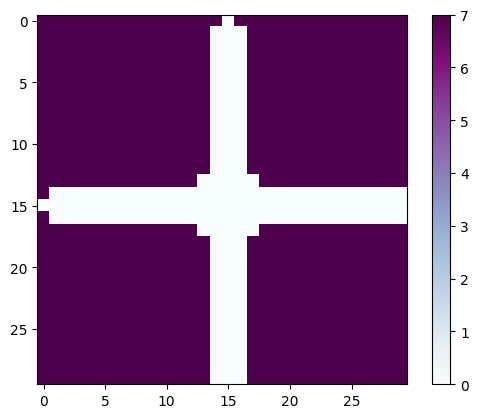

In [36]:
# (a) Patterns in evelutionary games
# Parameters
N = 7
my = 0
T = 0
R = 0.9
P = 1
S = 1.5
L = 30

randint = (0, 1 + 1)

timesteps = 20
start = time.time()

SList = np.linspace(1,3,30)
numberCooperators = []
for S in SList:
    strategy = np.zeros([L,L]) + N
    strategy[int(L/2),int(L/2)] = 0 # Defector in the middle 1
    for ts in range(0,timesteps):
        yearsPrison = np.zeros([L,L])
        for i in range(0,L):
            for j in range(0,L):
                years = 0
                years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
                years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
                years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
                years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
                yearsPrison[i,j] = years
        newStrategy = np.zeros([L,L])
        for i in range(0,L):
            for j in range(0,L):
                strategyIndex= np.argmin([yearsPrison[i,j],yearsPrison[i,(j+1)%L],yearsPrison[i,j-1],yearsPrison[(i+1)%L,j],yearsPrison[i-1,j]])
                strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
                newStrategy[i,j] =strategyList[strategyIndex]
                
                #Mutation:
                r = np.random.random()
                if r < my:
                    r2 = np.random.random()
                    if r2 < 0.5:
                        newStrategy[i,j] = 0
                    else:
                        newStrategy[i,j] = N
        strategy = newStrategy
    numberCooperators.append(sum(sum(strategy))/N)

# Plots
plt.figure(2)
plt.imshow(strategy,'BuPu')
plt.colorbar()

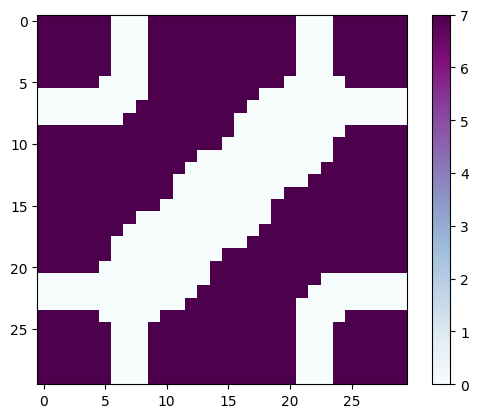

In [37]:
# (b) Different initial defectors
# Parameters

N = 7
T = 0
R = 0.9
P = 1
S = 1.5
my = 0
L = 30

randint = (0, 1 + 1)

timesteps = 20
start = time.time()

SList = np.linspace(1,3,30)
numberCooperators = []
for S in SList:
    strategy = np.zeros([L,L]) + N
    # 2 defectors
    #strategy[int(L/3),int(L/1.5)] = 0 # Defectors
    #strategy[int(L/1.5), int(L/3)] = 0
    
    # 3 defectors
    #strategy[int(L/2),int(L/2)] = 0 
    #strategy[int(L/1.2),int(L/6)] = 0
    #strategy[int(L/6), int(L/1.2)] = 0
    
    #4 defectors
    strategy[7,22] = 0
    strategy[12,17] = 0
    strategy[17,12] = 0
    strategy[22,7] = 0

    
    for ts in range(0,timesteps):
        yearsPrison = np.zeros([L,L])
        for i in range(0,L):
            for j in range(0,L):
                years = 0
                years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
                years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
                years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
                years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
                yearsPrison[i,j] = years
        newStrategy = np.zeros([L,L])
        for i in range(0,L):
            for j in range(0,L):
                strategyIndex= np.argmin([yearsPrison[i,j],yearsPrison[i,(j+1)%L],yearsPrison[i,j-1],yearsPrison[(i+1)%L,j],yearsPrison[i-1,j]])
                strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
                newStrategy[i,j] =strategyList[strategyIndex]
                
                #Mutation:
                r = np.random.random()
                if r < my:
                    r2 = np.random.random()
                    if r2 < 0.5:
                        newStrategy[i,j] = 0
                    else:
                        newStrategy[i,j] = N
        strategy = newStrategy
    numberCooperators.append(sum(sum(strategy))/N)

# Plots
plt.figure(2)
plt.imshow(strategy,'BuPu')
plt.colorbar()


# Exercise 13.3

Text(0.5, 1.0, 'R = 0.84, S = 1.5')

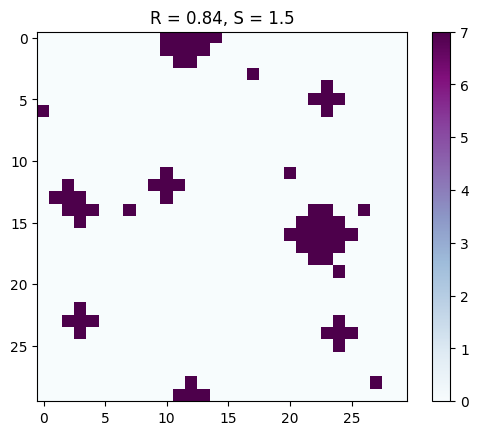

In [40]:
# (a) Varying R
# Parameters
N = 7
T = 0
R = 0.858
P = 1
S = 1.5
my = 0.01
L = 30

randint = (0, 1 + 1)
timesteps = 100
start = time.time()


for ts in range(0,timesteps):
    yearsPrison = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            years = 0
            years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
            years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
            yearsPrison[i,j] = years
    newStrategy = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            strategyIndex= np.argmin([yearsPrison[i,j],yearsPrison[i,(j+1)%L],yearsPrison[i,j-1],yearsPrison[(i+1)%L,j],yearsPrison[i-1,j]])
            strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
            newStrategy[i,j] =strategyList[strategyIndex]
            
            #Mutation:
            r = np.random.random()
            if r < my:
                r2 = np.random.random()
                if r2 < 0.5:
                    newStrategy[i,j] = 0
                else:
                    newStrategy[i,j] = N
    strategy = newStrategy


# Plot
plt.figure(2)
plt.imshow(strategy,'BuPu')
plt.colorbar()
plt.title('R = 0.84, S = 1.5')



Text(0.5, 1.0, 'R = 0.84, S = 1.5')

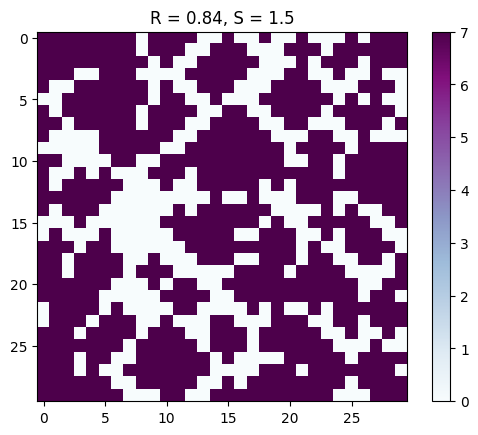

In [42]:
# Varying S
# Parameters
N = 7
T = 0
R = 0.84
P = 1
S = 1.5
my = 0.01
L = 30


randint = (0, 1 + 1)
timesteps = 100
start = time.time()


for ts in range(0,timesteps):
    prisonYears = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            years = 0
            years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
            years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
            prisonYears[i,j] = years
    newStrategy = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            strategyIndex= np.argmin([prisonYears[i,j],prisonYears[i,(j+1)%L],prisonYears[i,j-1],prisonYears[(i+1)%L,j],prisonYears[i-1,j]])
            strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
            newStrategy[i,j] =strategyList[strategyIndex]
            
            #Mutation:
            r = np.random.random()
            if r < my:
                r2 = np.random.random()
                if r2 < 0.5:
                    newStrategy[i,j] = 0
                else:
                    newStrategy[i,j] = N
    strategy = newStrategy


# Plot
plt.figure(2)
plt.imshow(strategy,'BuPu')
plt.colorbar()
plt.title('R = 0.84, S = 1.5')


# Exercise 13.4

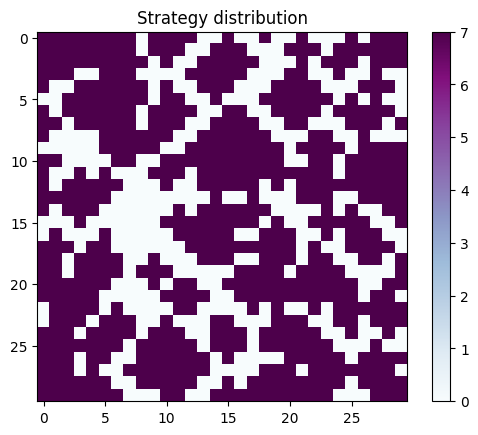

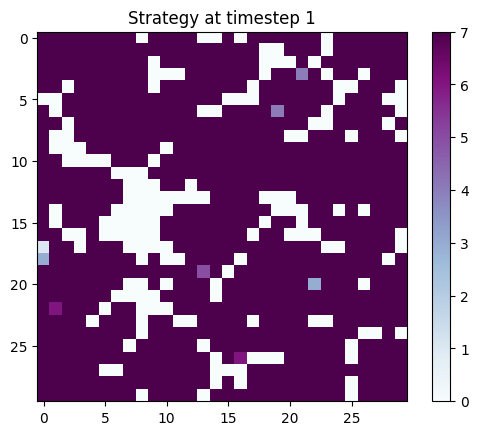

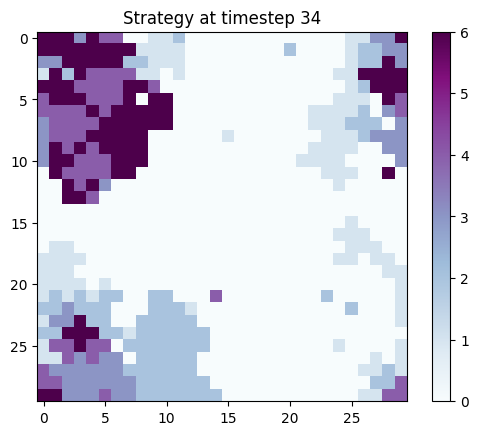

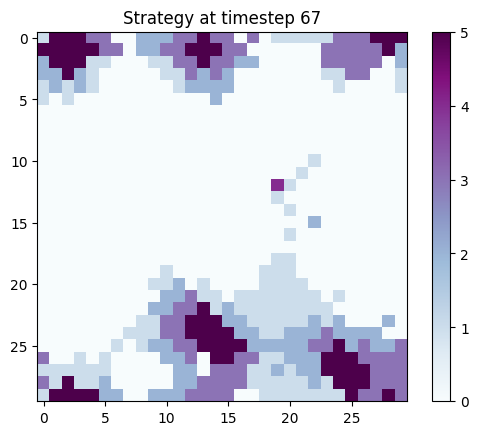

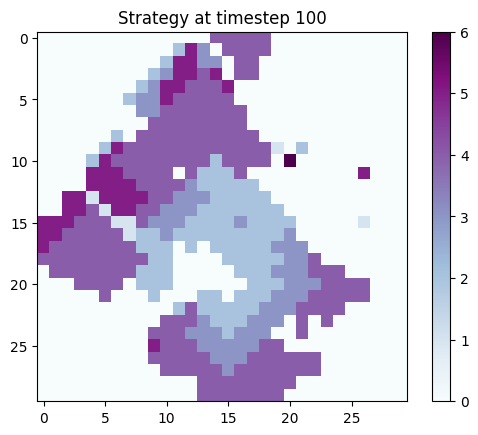

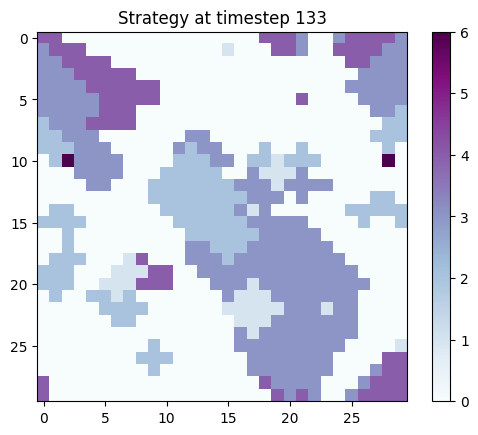

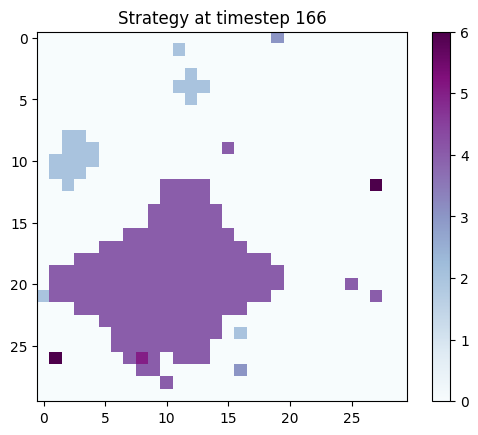

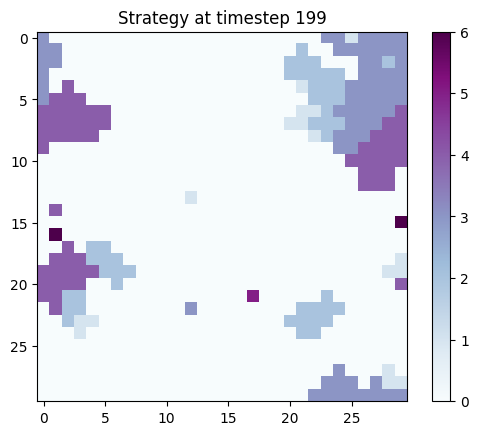

In [43]:
# (a)
# Parameters
N = 7
T = 0
R = 0.72
P = 1
S = 1.5
my = 0.01
L = 30
randint = (0, 7 + 1)

plt.figure(1)
plt.imshow(strategy,'BuPu')
plt.colorbar()
plt.title('Strategy distribution')

timesteps = 200
start = time.time()


populations = np.zeros([N+1,timesteps])



fcount = 1
for ts in range(0,timesteps):
    prisonYears = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            years = 0
            years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
            years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
            prisonYears[i,j] = years
    newStrategy = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            strategyIndex= np.argmin([prisonYears[i,j],prisonYears[i,(j+1)%L],prisonYears[i,j-1],prisonYears[(i+1)%L,j],prisonYears[i-1,j]])
            strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
            newStrategy[i,j] =strategyList[strategyIndex]
            
            #Mutation:
            r = np.random.random()
            if r < my:
                newStrategy[i,j] = np.random.randint(0,N)
    strategy = newStrategy
    
    
    for i in range(0,N+1):
        p = np.zeros([L,L])
        p[strategy == i] = 1
        populations[i,ts] = sum(sum(p))
    
    
    if ts%(int(timesteps/6))==0:
        fcount += 1
        plt.figure(fcount)
        plt.imshow(strategy,'BuPu')
        plt.colorbar()
        plt.title('Strategy at timestep %i'%(ts+1))

computingtime: 1.2086410522460938


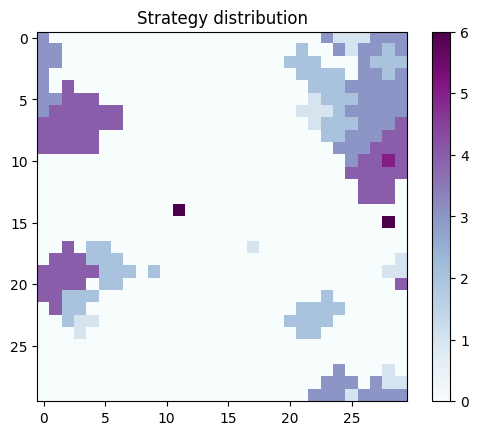

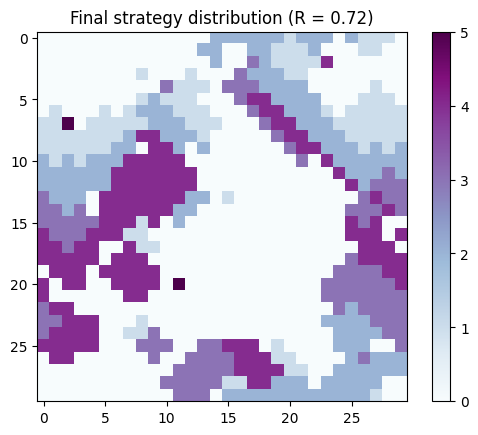

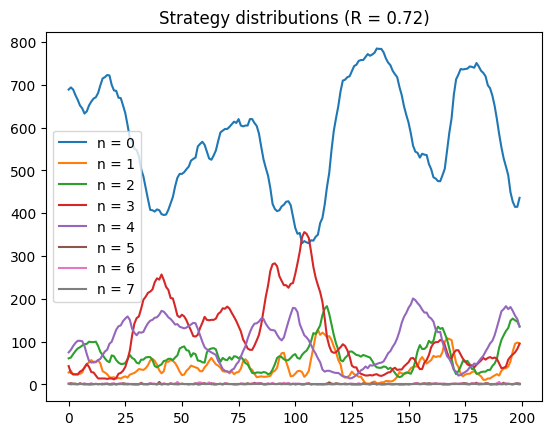

In [44]:
# (b)
# Parameters
N = 7
T = 0
R = 0.72
P = 1
S = 1.5
my = 0.01
L = 30

randint = (0, 7 + 1)

plt.figure(1)
plt.imshow(strategy,'BuPu')
plt.colorbar()
plt.title('Strategy distribution')

timesteps = 200
start = time.time()

populations = np.zeros([N+1,timesteps])

fcount = 1
for ts in range(0,timesteps):
    prisonYears = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            years = 0
            years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
            years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
            years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
            prisonYears[i,j] = years
    newStrategy = np.zeros([L,L])
    for i in range(0,L):
        for j in range(0,L):
            strategyIndex= np.argmin([prisonYears[i,j],prisonYears[i,(j+1)%L],prisonYears[i,j-1],prisonYears[(i+1)%L,j],prisonYears[i-1,j]])
            strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
            newStrategy[i,j] =strategyList[strategyIndex]
            
            #Mutation:
            r = np.random.random()
            if r < my:
                newStrategy[i,j] = np.random.randint(0,N)
    strategy = newStrategy
    
    
    for i in range(0,N+1):
        p = np.zeros([L,L])
        p[strategy == i] = 1
        populations[i,ts] = sum(sum(p))


plt.figure(2)
plt.imshow(strategy,'BuPu')
plt.colorbar()
plt.title('Final strategy distribution (R = 0.72)')

plt.figure(3)
for i in range(0,N+1):
    plt.plot(populations[i,:],label = 'n = %i'%i)
plt.legend()
plt.title('Strategy distributions (R = 0.72)')


print('computingtime:', time.time()-start)

# Exercise 13.5

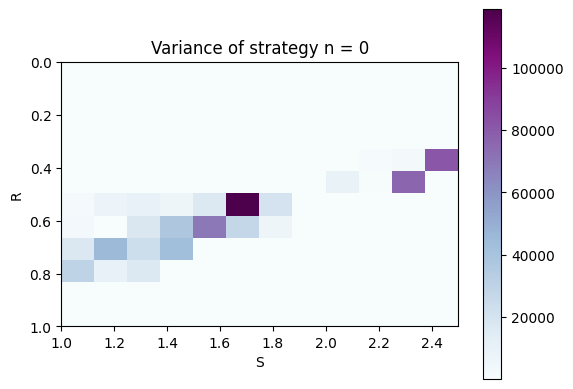

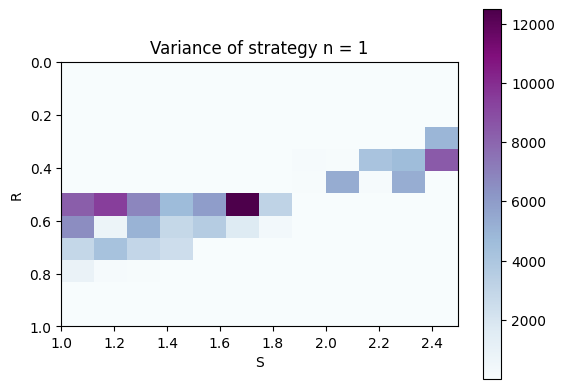

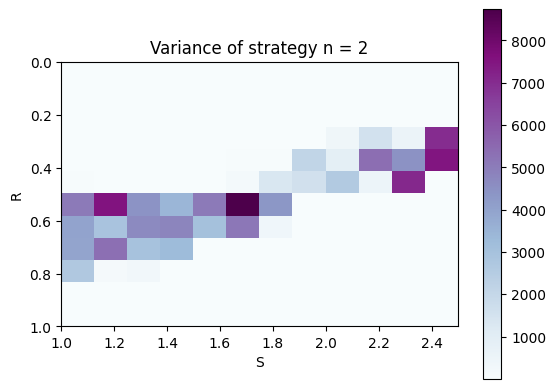

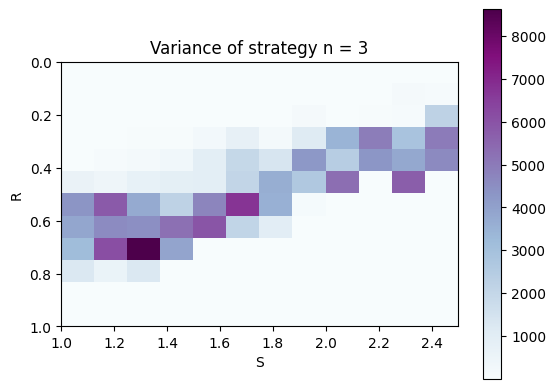

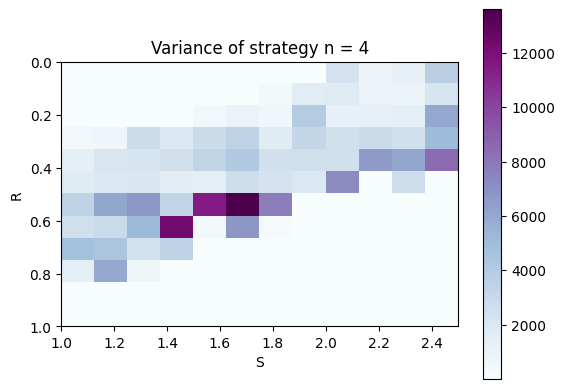

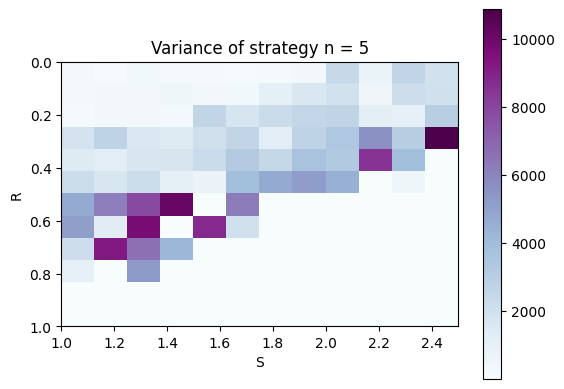

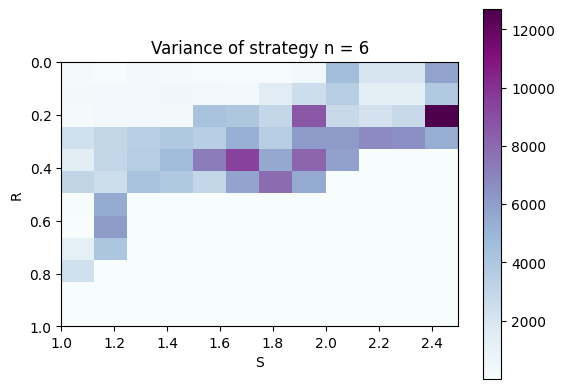

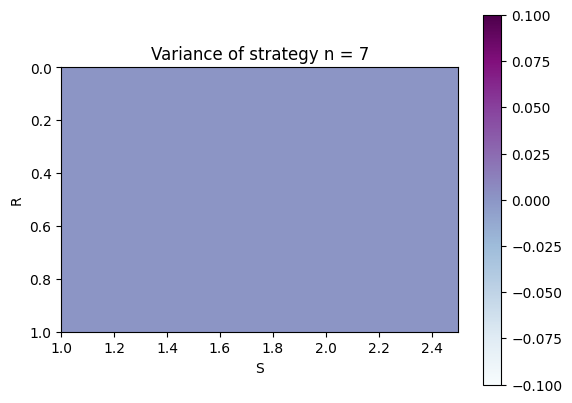

In [45]:
# (a) 
# Parameters
N = 7
T = 0
R = 0.1
P = 1
S = 1.5
my = 0.01
L = 30

randint = (0, 7 + 1)
timesteps = 500
start = time.time()

# List R and S
Rlist = np.linspace(0,1,12)
Slist = np.linspace(1,2.5,12)

varianceList = np.zeros([N+1,len(Rlist),len(Slist)])

for Rindex in range(0,len(Rlist)):
    R = Rlist[Rindex]
    for Sindex in range(0,len(Slist)):
        S = Slist[Sindex]
        populations = np.zeros([N+1,timesteps])
        for ts in range(0,timesteps):
            yearsPrison = np.zeros([L,L])
            for i in range(0,L):
                for j in range(0,L):
                    years = 0
                    years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
                    years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
                    years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
                    years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
                    yearsPrison[i,j] = years
            newStrategy = np.zeros([L,L])
            for i in range(0,L):
                for j in range(0,L):
                    strategyIndex= np.argmin([yearsPrison[i,j],yearsPrison[i,(j+1)%L],yearsPrison[i,j-1],yearsPrison[(i+1)%L,j],yearsPrison[i-1,j]])
                    strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
                    newStrategy[i,j] =strategyList[strategyIndex]
                    
                    #Mutation:
                    r = np.random.random()
                    if r < my:
                        newStrategy[i,j] = np.random.randint(0,N)
            strategy = newStrategy
            
            for i in range(0,N+1):
                p = np.zeros([L,L])
                p[strategy == i] = 1
                populations[i,ts] = sum(sum(p))
    
        for i in range(0,N+1):
            varianceList[i,Rindex,Sindex] = np.var(populations[i,100::]) # Omit the first 100 steps


combinedVariance = sum(varianceList,1)
threshhold = 20000
phaseDiagram = np.zeros([len(Rlist),len(Slist)])
phaseDiagram[combinedVariance>threshhold] = 1

# Plots
for i in range(0,N+1):
    plt.figure(i)
    plt.imshow(varianceList[i,:,:],extent = [1,2.5,1,0], cmap='BuPu')
    plt.colorbar()
    plt.xlabel('S')
    plt.ylabel('R')
    plt.title('Variance of strategy n = %i'%(i))


Text(0.5, 1.0, 'Phase diagram')

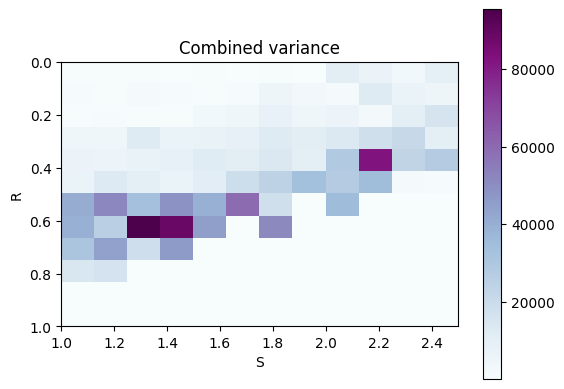

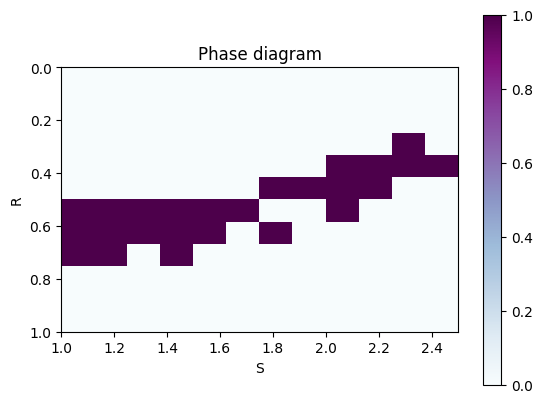

In [46]:
# (b)
# Parameters
N = 7
T = 0
R = 0.1
P = 1
S = 1.5
my = 0.01
L = 30

randint = (0, 7 + 1)
timesteps = 500
start = time.time()

# List for R AND S
Rlist = np.linspace(0,1,12)
Slist = np.linspace(1,2.5,12)

varianceList = np.zeros([N+1,len(Rlist),len(Slist)])

for Rindex in range(0,len(Rlist)):
    R = Rlist[Rindex]
    for Sindex in range(0,len(Slist)):
        S = Slist[Sindex]
        populations = np.zeros([N+1,timesteps])
        for ts in range(0,timesteps):
            yearsPrison = np.zeros([L,L])
            for i in range(0,L):
                for j in range(0,L):
                    years = 0
                    years += game(strategy[i,j],strategy[i,(j+1)%L],N,T,R,P,S)
                    years += game(strategy[i,j],strategy[i,j-1],N,T,R,P,S)
                    years += game(strategy[i,j],strategy[(i+1)%L,j],N,T,R,P,S)
                    years += game(strategy[i,j],strategy[i-1,j],N,T,R,P,S)
                    yearsPrison[i,j] = years
            newStrategy = np.zeros([L,L])
            
            for i in range(0,L):
                for j in range(0,L):
                    strategyIndex= np.argmin([yearsPrison[i,j],yearsPrison[i,(j+1)%L],yearsPrison[i,j-1],yearsPrison[(i+1)%L,j],yearsPrison[i-1,j]])
                    strategyList = [strategy[i,j],strategy[i,(j+1)%L],strategy[i,j-1],strategy[(i+1)%L,j],strategy[i-1,j]]
                    newStrategy[i,j] =strategyList[strategyIndex]
                    
                    #Mutation:
                    r = np.random.random()
                    if r < my:
                        newStrategy[i,j] = np.random.randint(0,N)
            strategy = newStrategy
            
            
            for i in range(0,N+1):
                p = np.zeros([L,L])
                p[strategy == i] = 1
                populations[i,ts] = sum(sum(p))
    
        for i in range(0,N+1):
            varianceList[i,Rindex,Sindex] = np.var(populations[i,100::])

combinedVariance = sum(varianceList,1)
threshhold = 20000
phaseDiagram = np.zeros([len(Rlist),len(Slist)])
phaseDiagram[combinedVariance>threshhold] = 1

# Plots
plt.figure(1)
plt.imshow(combinedVariance,extent = [1,2.5,1,0], cmap='BuPu')
plt.colorbar()
plt.xlabel('S')
plt.ylabel('R')
plt.title('Combined variance')

plt.figure(2)
plt.imshow(phaseDiagram, extent = [1,2.5,1,0], cmap='BuPu')
plt.colorbar()
plt.xlabel('S')
plt.ylabel('R')
plt.title('Phase diagram')
